# Information

In [ ]:
import pandas as pd

# Define paths to datasets
dataset_paths = {
    "WISDM": (
        ['/content/drive/MyDrive/Colab Notebooks/data/WISDM/wisdm_train.csv'],
        ['/content/drive/MyDrive/Colab Notebooks/data/WISDM/wisdm_test.csv'],
        ['/content/drive/MyDrive/Colab Notebooks/data/WISDM/wisdm_unseen.csv']
    ),
    "DaLiAc": (
        ['/content/drive/MyDrive/Colab Notebooks/data/daliac/daliac_ALL_train.csv'],
        ['/content/drive/MyDrive/Colab Notebooks/data/daliac/daliac_ALL_test.csv'],
        ['/content/drive/MyDrive/Colab Notebooks/data/daliac/daliac_ALL_unseen.csv']
    ),
    "PAMAP2": (
        ['/content/drive/MyDrive/Colab Notebooks/data/PAMAP2/pamap2_ALL_train.csv'],
        ['/content/drive/MyDrive/Colab Notebooks/data/PAMAP2/pamap2_ALL_test.csv'],
        ['/content/drive/MyDrive/Colab Notebooks/data/PAMAP2/pamap2_ALL_unseen.csv']
    ),
    "Motionsense": (
        ['/content/drive/MyDrive/Colab Notebooks/data/MotionSense/motionsense_ALL_train.csv'],
        ['/content/drive/MyDrive/Colab Notebooks/data/MotionSense/motionsense_ALL_test.csv'],
        ['/content/drive/MyDrive/Colab Notebooks/data/MotionSense/motionsense_ALL_unseen.csv']
    )
}

# Function to display dataset info
def display_dataset_info(dataset_name, paths):
    for i, path in enumerate(paths):
        df = pd.read_csv(path[0])  # Load the dataset
        split = ['Train', 'Test', 'Unseen'][i]  # Identify the split
        print(f"\nDataset: {dataset_name} ({split})")
        print(f"Number of data points: {df.shape[0]}")
        print(f"Number of columns: {df.shape[1]}")
        print(f"Column names: {df.columns.tolist()}")

# Loop over each dataset and display info
for dataset_name, paths in dataset_paths.items():
    display_dataset_info(dataset_name, paths)



Dataset: WISDM (Train)
Number of data points: 651808
Number of columns: 5
Column names: ['SubjectID', 'activity', 'accX', 'accY', 'accZ']

Dataset: WISDM (Test)
Number of data points: 217206
Number of columns: 5
Column names: ['SubjectID', 'activity', 'accX', 'accY', 'accZ']

Dataset: WISDM (Unseen)
Number of data points: 217206
Number of columns: 5
Column names: ['SubjectID', 'activity', 'accX', 'accY', 'accZ']

Dataset: DaLiAc (Train)
Number of data points: 1368323
Number of columns: 26
Column names: ['SubjectID', 'activity', 'acc_X_hand', 'acc_Y_hand', 'acc_Z_hand', 'gyro_X_hand', 'gyro_Y_hand', 'gyro_Z_hand', 'acc_X_chest', 'acc_Y_chest', 'acc_Z_chest', 'gyro_X_chest', 'gyro_Y_chest', 'gyro_Z_chest', 'acc_X_hip', 'acc_Y_hip', 'acc_Z_hip', 'gyro_X_hip', 'gyro_Y_hip', 'gyro_Z_hip', 'acc_X_ankle', 'acc_Y_ankle', 'acc_Z_ankle', 'gyro_X_ankle', 'gyro_Y_ankle', 'gyro_Z_ankle']

Dataset: DaLiAc (Test)
Number of data points: 456066
Number of columns: 26
Column names: ['SubjectID', 'activi

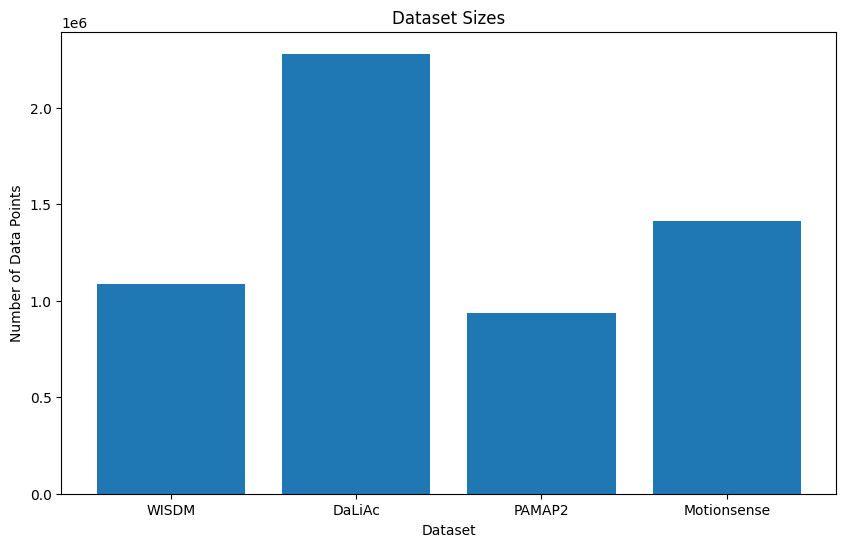

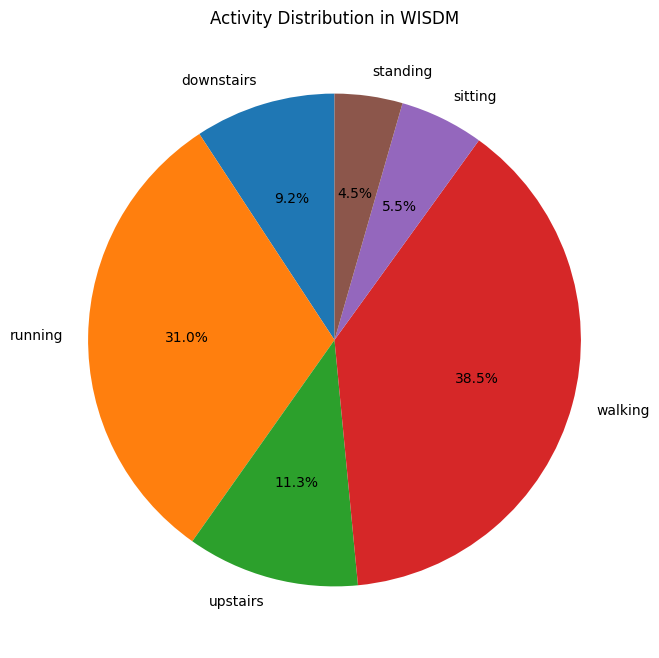

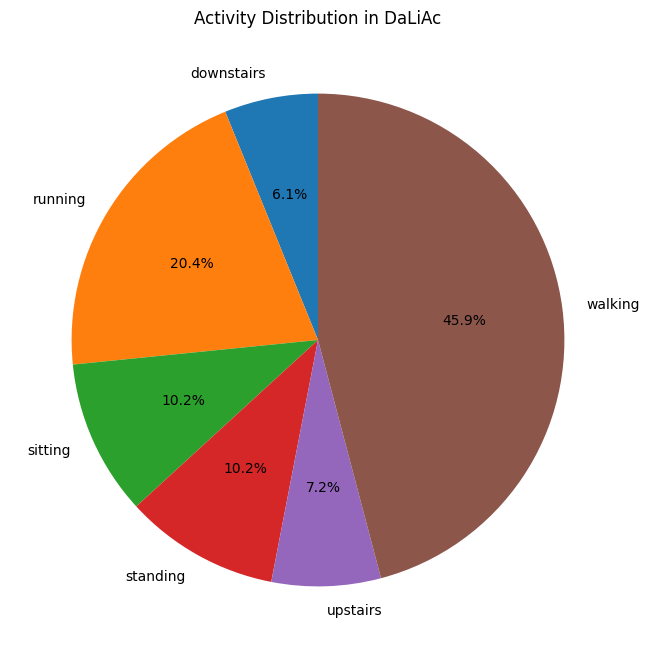

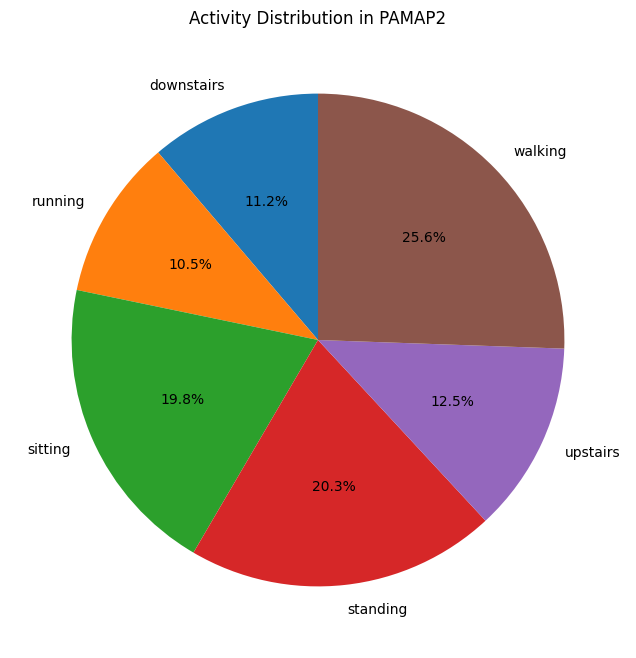

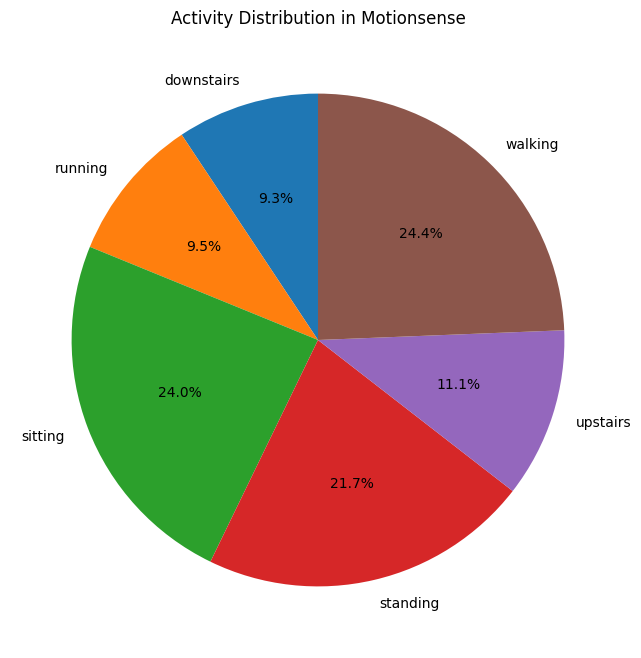

In [ ]:
# prompt: create a graph of represennt portion of each dataset  Dataset: WISDM (Train+Test+Unseen), Dataset: DaLiAc (Train+Test+Unseen), Dataset: PAMAP2 (Train+Test+Unseen), Dataset: Motionsense (Train+Test+Unseen). group by category in column 'activity'.

import pandas as pd
import matplotlib.pyplot as plt

dataset_sizes = {}
for dataset_name, paths in dataset_paths.items():
  total_size = 0
  for path in paths:
    df = pd.read_csv(path[0])
    total_size += df.shape[0]
  dataset_sizes[dataset_name] = total_size

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(dataset_sizes.keys(), dataset_sizes.values())
plt.xlabel("Dataset")
plt.ylabel("Number of Data Points")
plt.title("Dataset Sizes")
plt.show()


activity_counts = {}
for dataset_name, paths in dataset_paths.items():
  activity_counts[dataset_name] = {}
  for path in paths:
    df = pd.read_csv(path[0])
    for activity in df['activity'].unique():
      if activity not in activity_counts[dataset_name]:
        activity_counts[dataset_name][activity] = 0
      activity_counts[dataset_name][activity] += df[df['activity'] == activity].shape[0]

# Create a pie chart for each dataset
for dataset_name, counts in activity_counts.items():
  plt.figure(figsize=(8, 8))
  plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', startangle=90)
  plt.title(f"Activity Distribution in {dataset_name}")
  plt.show()


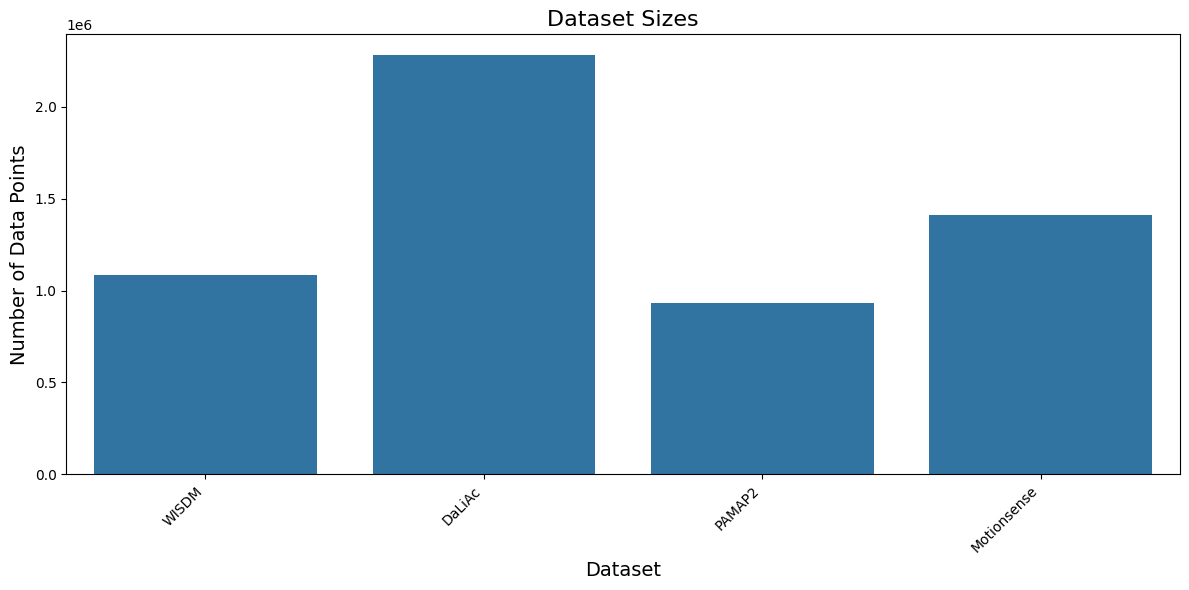

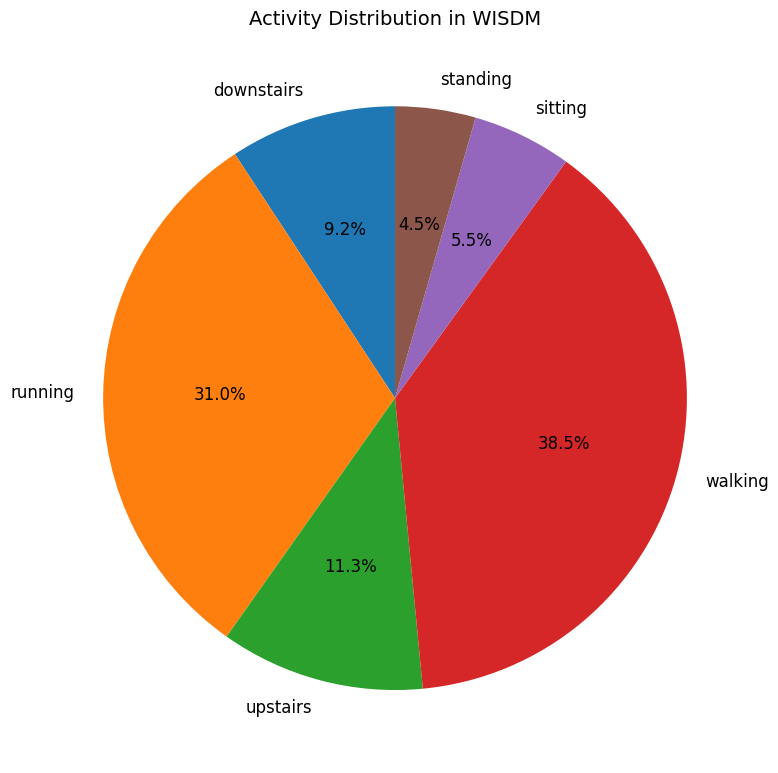

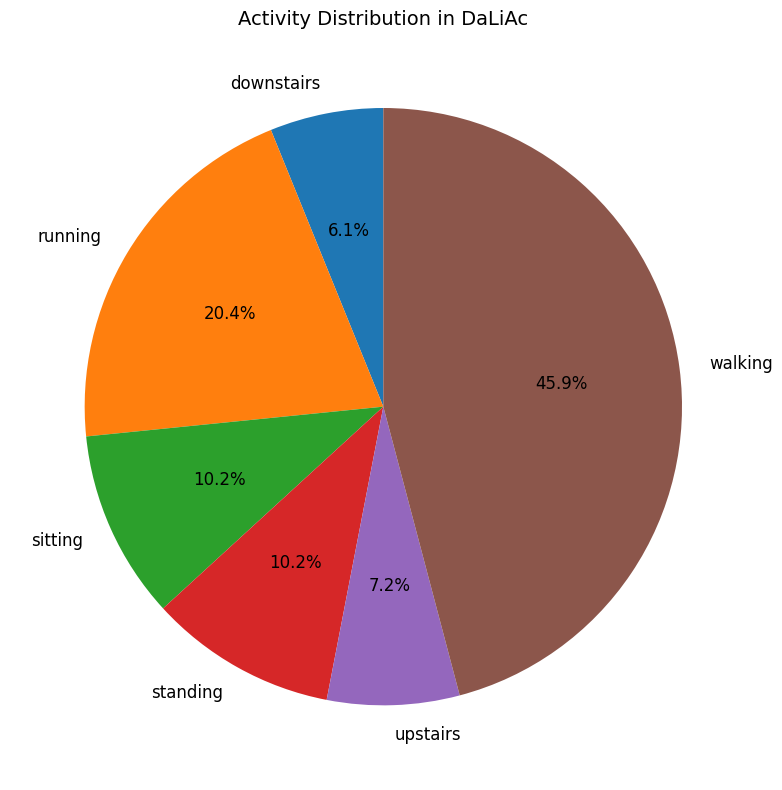

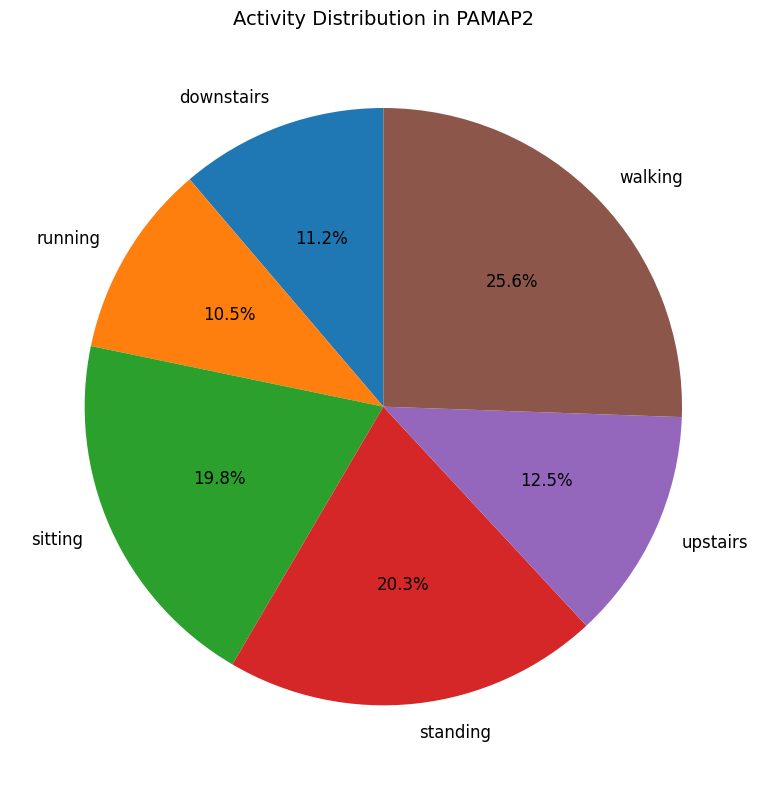

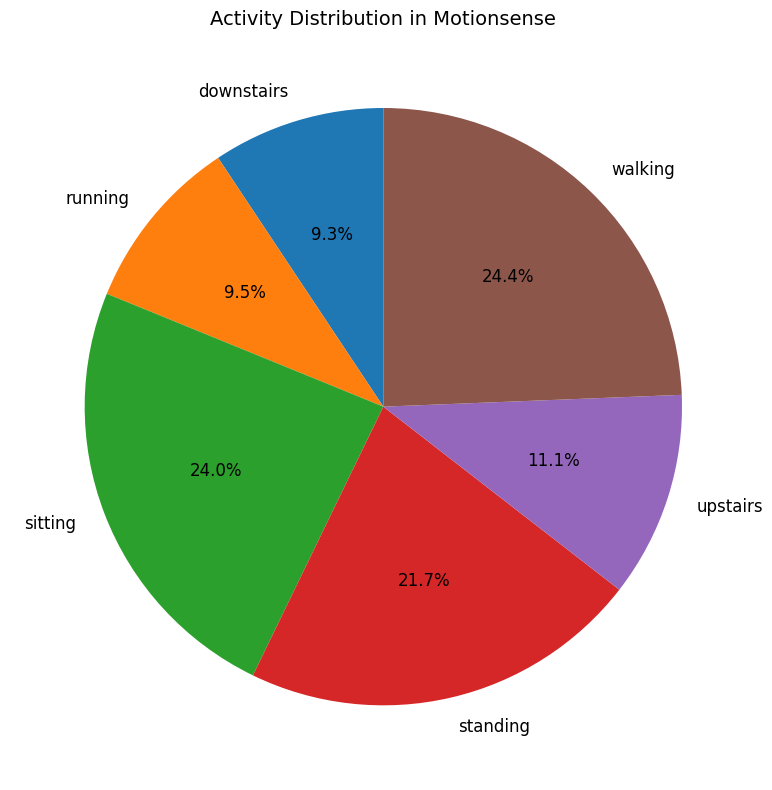

In [ ]:
# prompt: update code from previous cell. To visualize good presentation.

from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dataset_sizes = {}
for dataset_name, paths in dataset_paths.items():
  total_size = 0
  for path in paths:
    df = pd.read_csv(path[0])
    total_size += df.shape[0]
  dataset_sizes[dataset_name] = total_size

# Create a bar chart with improved aesthetics
plt.figure(figsize=(12, 6))
sns.barplot(x=list(dataset_sizes.keys()), y=list(dataset_sizes.values()))
plt.xlabel("Dataset", fontsize=14)
plt.ylabel("Number of Data Points", fontsize=14)
plt.title("Dataset Sizes", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


activity_counts = {}
for dataset_name, paths in dataset_paths.items():
  activity_counts[dataset_name] = {}
  for path in paths:
    df = pd.read_csv(path[0])
    for activity in df['activity'].unique():
      if activity not in activity_counts[dataset_name]:
        activity_counts[dataset_name][activity] = 0
      activity_counts[dataset_name][activity] += df[df['activity'] == activity].shape[0]

# Create pie charts for each dataset with improved aesthetics
for dataset_name, counts in activity_counts.items():
  plt.figure(figsize=(8, 8))
  plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
  plt.title(f"Activity Distribution in {dataset_name}", fontsize=14)
  plt.tight_layout()
  plt.show()


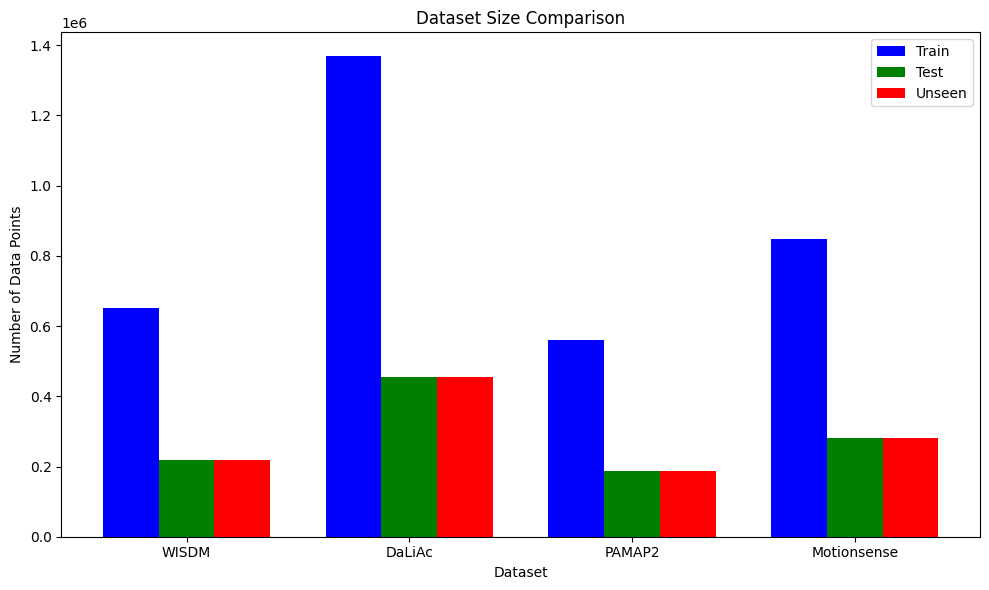

In [ ]:
# prompt: create a graph of comparing between dataset for each dataset in one graph with academic style

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extract dataset sizes for each split
dataset_sizes = {}
for dataset_name, paths in dataset_paths.items():
    dataset_sizes[dataset_name] = []
    for path in paths:
        df = pd.read_csv(path[0])
        dataset_sizes[dataset_name].append(df.shape[0])

# Create bar chart for comparison
dataset_names = list(dataset_sizes.keys())
train_sizes = [sizes[0] for sizes in dataset_sizes.values()]
test_sizes = [sizes[1] for sizes in dataset_sizes.values()]
unseen_sizes = [sizes[2] for sizes in dataset_sizes.values()]

bar_width = 0.25
r1 = np.arange(len(dataset_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(r1, train_sizes, color='blue', width=bar_width, label='Train')
plt.bar(r2, test_sizes, color='green', width=bar_width, label='Test')
plt.bar(r3, unseen_sizes, color='red', width=bar_width, label='Unseen')

plt.xlabel('Dataset')
plt.ylabel('Number of Data Points')
plt.title('Dataset Size Comparison')
plt.xticks([r + bar_width for r in range(len(dataset_names))], dataset_names)
plt.legend()
plt.tight_layout()
plt.show()


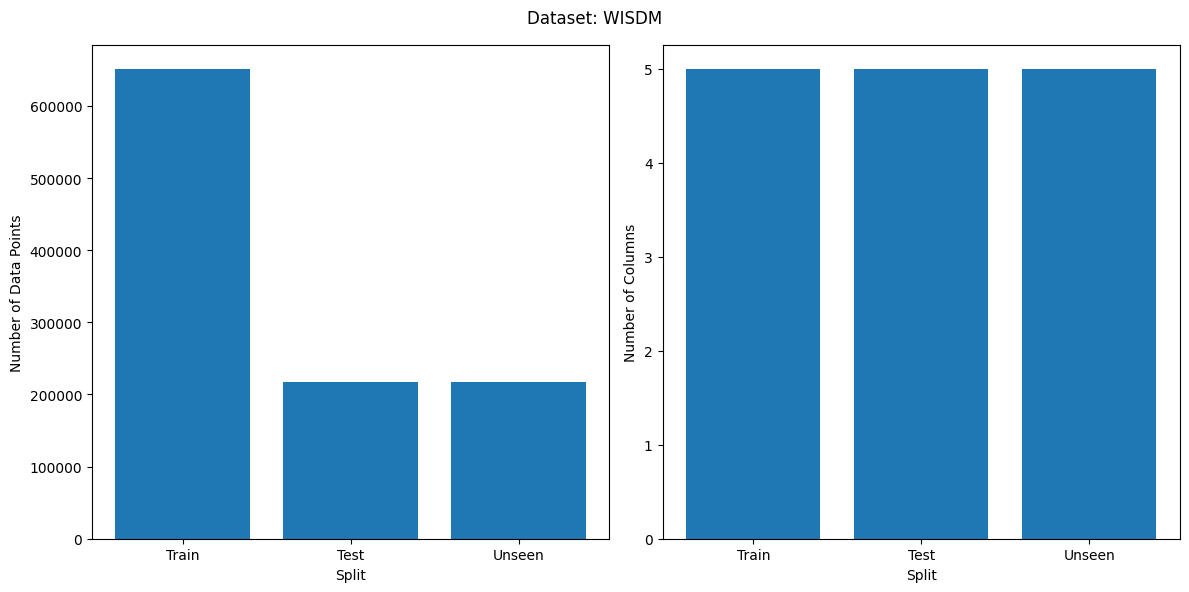

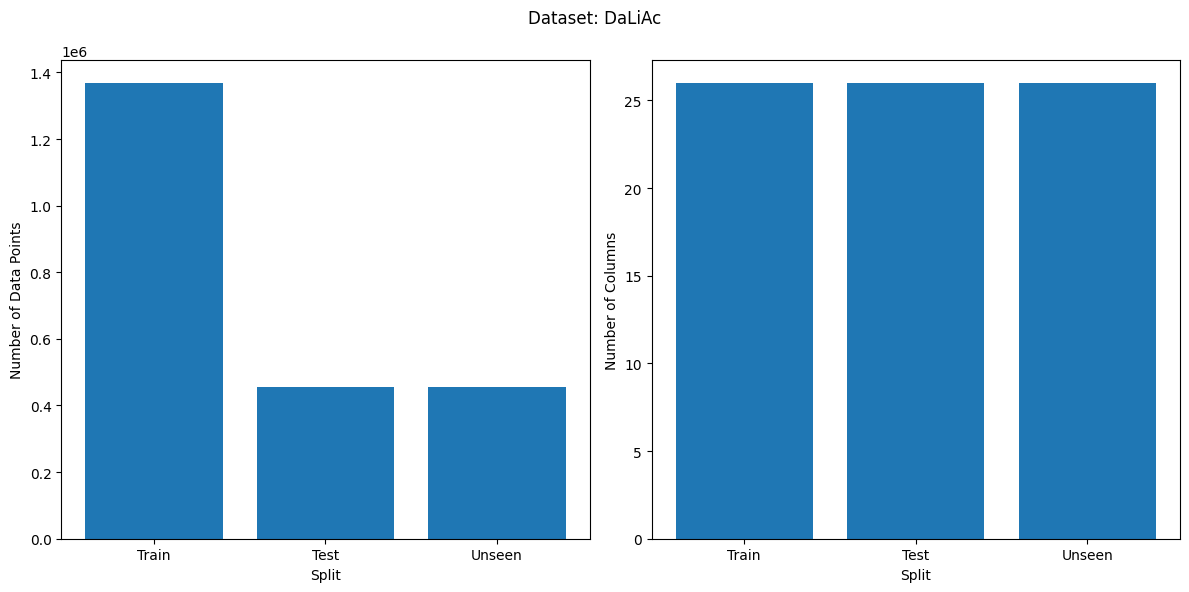

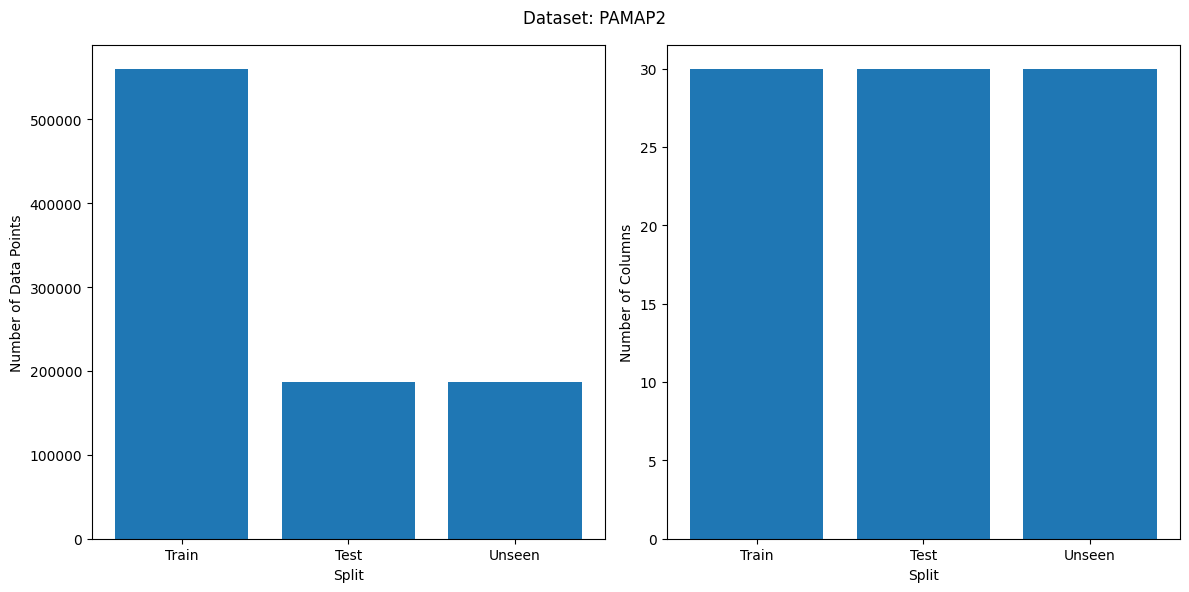

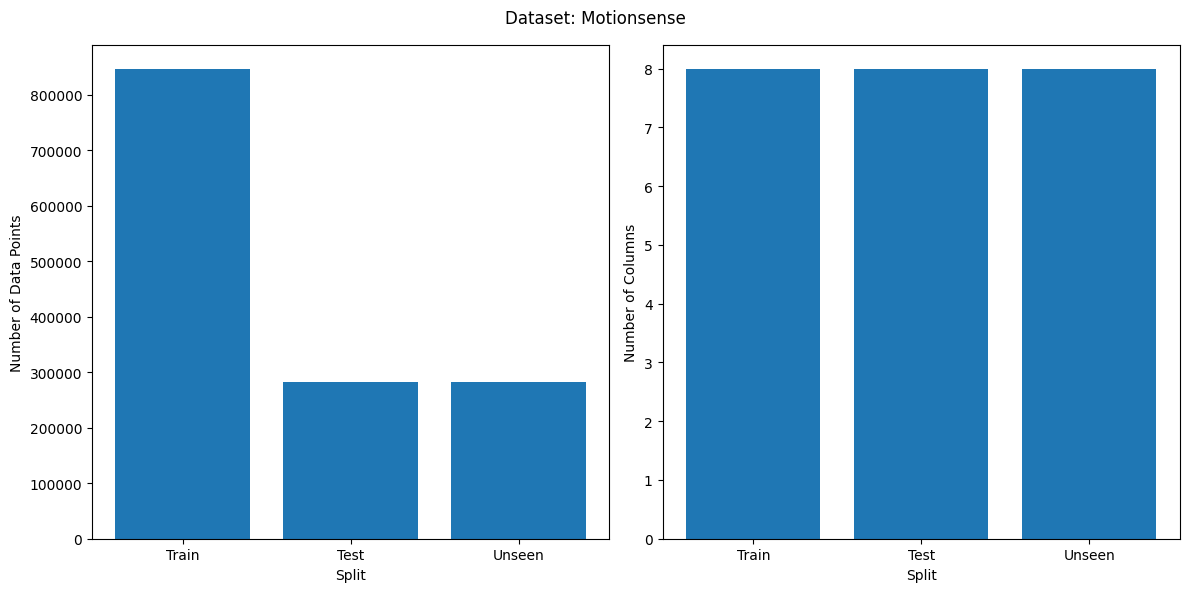

In [ ]:
# prompt: create a visualize to present an information for each dataset for every group [tran,test,unseen]

import pandas as pd
import matplotlib.pyplot as plt

def visualize_dataset_info(dataset_name, paths):
  """Visualizes dataset information for train, test, and unseen splits."""

  num_data_points = []
  num_columns = []
  splits = ['Train', 'Test', 'Unseen']

  for i, path in enumerate(paths):
    df = pd.read_csv(path[0])
    num_data_points.append(df.shape[0])
    num_columns.append(df.shape[1])

  # Create subplots for data points and columns
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  fig.suptitle(f"Dataset: {dataset_name}")

  # Plot number of data points
  axes[0].bar(splits, num_data_points)
  axes[0].set_xlabel("Split")
  axes[0].set_ylabel("Number of Data Points")

  # Plot number of columns
  axes[1].bar(splits, num_columns)
  axes[1].set_xlabel("Split")
  axes[1].set_ylabel("Number of Columns")

  plt.tight_layout()
  plt.show()


# Loop over each dataset and visualize info
for dataset_name, paths in dataset_paths.items():
  visualize_dataset_info(dataset_name, paths)


In [ ]:
# prompt: which dataset have a position _hand, _hip, _ankle, _wrist, _chest of data read from column name and counting data for each position

import pandas as pd
from collections import defaultdict

position_counts = defaultdict(lambda: defaultdict(int))

for dataset_name, paths in dataset_paths.items():
  for path in paths:
    df = pd.read_csv(path[0])
    for column in df.columns:
      if '_hand' in column or '_hip' in column or '_ankle' in column or '_wrist' in column or '_chest' in column:
        if 'hand' in column:
          position_counts[dataset_name]['_hand'] += df.shape[0]
        elif 'hip' in column:
          position_counts[dataset_name]['_hip'] += df.shape[0]
        elif 'ankle' in column:
          position_counts[dataset_name]['_ankle'] += df.shape[0]
        elif 'wrist' in column:
          position_counts[dataset_name]['_wrist'] += df.shape[0]
        elif 'chest' in column:
          position_counts[dataset_name]['_chest'] += df.shape[0]

print("Position Counts for Each Dataset:")
for dataset_name, positions in position_counts.items():
  print(f"\nDataset: {dataset_name}")
  for position, count in positions.items():
    print(f"  {position}: {count}")


Position Counts for Each Dataset:

Dataset: DaLiAc
  _hand: 13682730
  _chest: 13682730
  _hip: 13682730
  _ankle: 13682730

Dataset: PAMAP2
  _hand: 8408151
  _chest: 8408151
  _ankle: 8408151



Dataset: WISDM (Unseen)
SubjectID       1       2       3       4       5       6       7       8   \
activity                                                                     
downstairs   588.0     NaN   665.0   352.0   656.0   286.0   451.0   669.0   
running     2211.0  2357.0  2203.0   179.0  1281.0  2363.0  1836.0  2062.0   
sitting        NaN     NaN   321.0   251.0   332.0   335.0   505.0   539.0   
standing       NaN     NaN   564.0     NaN   303.0   141.0   472.0   653.0   
upstairs     624.0     NaN   682.0   275.0   677.0   333.0   720.0   890.0   
walking     2572.0  2347.0  2594.0  1215.0  2451.0  2479.0  2206.0  3421.0   

SubjectID       9       10  ...      27      28      29      30      31  \
activity                    ...                                           
downstairs     NaN   759.0  ...   692.0   599.0   865.0   774.0   778.0   
running        NaN  2416.0  ...  2407.0     NaN  2557.0     NaN  2815.0   
sitting        NaN     NaN  ...   419.0     NaN   

<Figure size 1200x600 with 0 Axes>

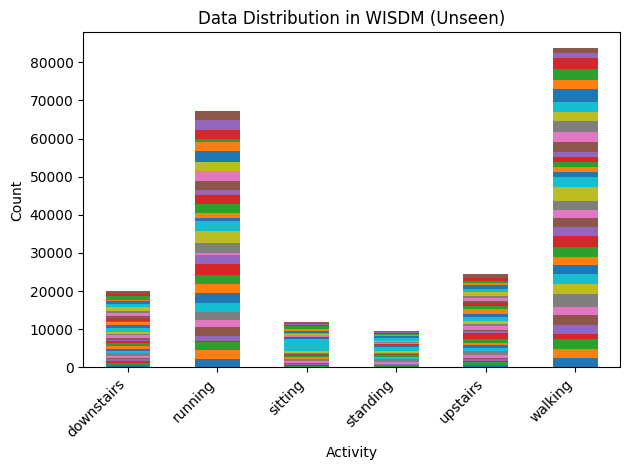


Dataset: DaLiAc (Unseen)
SubjectID      1      2      3      4      5     6      7     8      9     10  \
activity                                                                        
downstairs   1393   1434   1433   1761   1024  1556   1638  1147   1311  1761   
running      5079   4956   4915   4956   4956  4997   4915  4792   4915  4874   
sitting      2458   2458   2416   2457   2498  2458   2458  2417   2457  2416   
standing     2457   2416   2458   2457   2457  2457   2457  2376   2458  2457   
upstairs     1392   1802   1966   2007   1270  1679   1843  1474   1474  1884   
walking     10404  19989  11141  10035  13394  6472  15770  8274  10609  9994   

SubjectID      11    12     13     14     15     16    17    18    19  
activity                                                               
downstairs   1556  1597   1474   1433   1433   1270  1597  1597  1597  
running      4792  4915   4915   4915   4833   4874  4915  4915  4833  
sitting      2335  2662   2417   2498

<Figure size 1200x600 with 0 Axes>

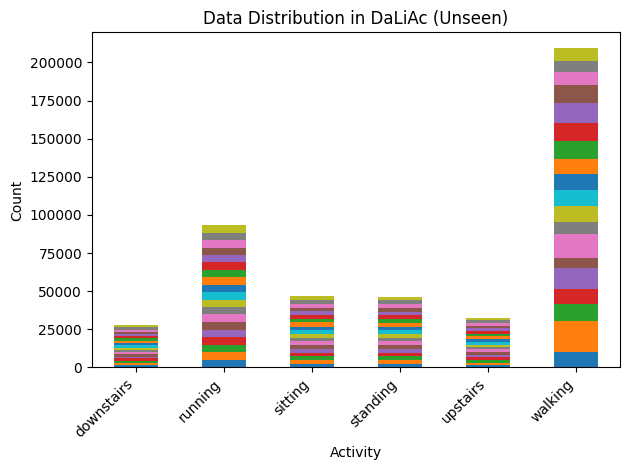


Dataset: PAMAP2 (Unseen)
SubjectID      101     102     103     104     105     106     107     108
activity                                                                  
downstairs  2981.0  3044.0  3055.0  2857.0  2546.0  2255.0  2325.0  1931.0
running     4253.0  1849.0     NaN     1.0  4930.0  4565.0   739.0  3307.0
sitting     4696.0  4469.0  5753.0  5099.0  5374.0  4609.0  2457.0  4586.0
standing    4344.0  5116.0  4108.0  4942.0  4427.0  4872.0  5151.0  5032.0
upstairs    3178.0  3469.0  2079.0  3340.0  2857.0  2659.0  3530.0  2338.0
walking     4452.0  6508.0  5808.0  6387.0  6408.0  5145.0  6744.0  6308.0


<Figure size 1200x600 with 0 Axes>

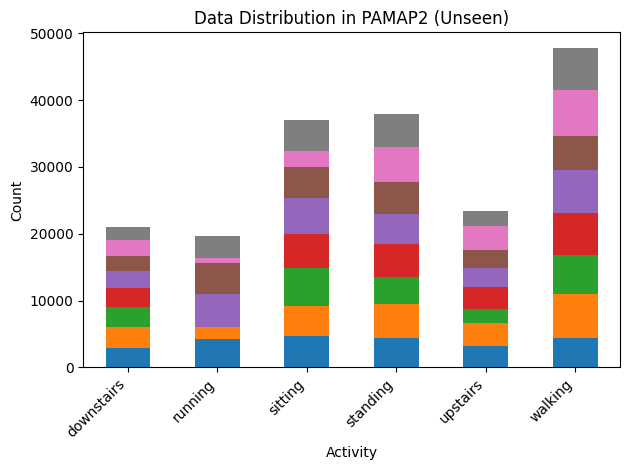


Dataset: Motionsense (Unseen)
SubjectID   0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   ...  \
activity                                                                ...   
downstairs  1021  1175  1264  1017  1009  1149  1007  1156  1099  1335  ...   
running     1285  1283  1193  1243   864  1054  1179  1239   983  1170  ...   
sitting     4116  2586  2839  2433  2781  2370  3260  2875  3241  3052  ...   
standing    2549  2055  2861  2113  2483  2870  2377  2733  1965  2082  ...   
upstairs    1267  1447  1311  1291  1115  1077  1490  1426  1298  1365  ...   
walking     2222  3920  3039  3115  2202  2944  2940  2714  2838  2954  ...   

SubjectID   14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  
activity                                                                
downstairs   937  1305  1236  1450  1080  1150  1501   888  1244   709  
running     1030  1302   867  1223  1284  1105  1434  1256  1192   726  
sitting     3159  3045  2865  2683  3330  20

<Figure size 1200x600 with 0 Axes>

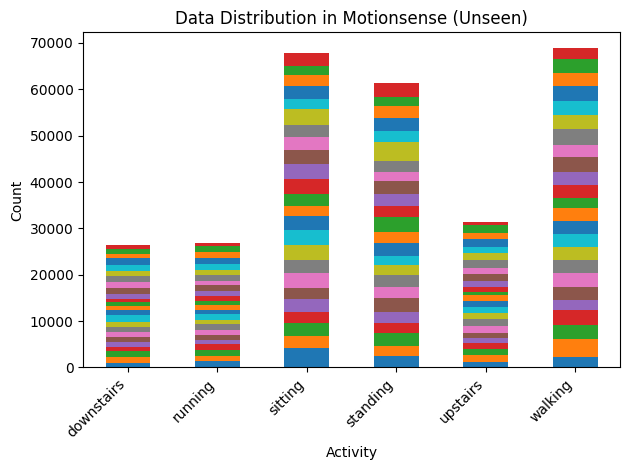

In [ ]:
# prompt: print amount of data in group by activity and SubjectID for Unseen set of each dataset and plotting don't show label data on graph

import pandas as pd
import matplotlib.pyplot as plt

for dataset_name, paths in dataset_paths.items():
  unseen_path = paths[2][0]
  df_unseen = pd.read_csv(unseen_path)

  # Group by activity and subject ID and count the number of rows in each group
  # Use 'SubjectID' instead of 'subjectID' to match the column name in the DataFrame
  activity_subject_counts = df_unseen.groupby(['activity', 'SubjectID'])['activity'].count().unstack()

  print(f"\nDataset: {dataset_name} (Unseen)")
  print(activity_subject_counts)

  # Plot the data with improved aesthetics
  plt.figure(figsize=(12, 6))
  activity_subject_counts.plot(kind='bar', stacked=True)
  plt.xlabel("Activity")
  plt.ylabel("Count")
  plt.title(f"Data Distribution in {dataset_name} (Unseen)")
  plt.xticks(rotation=45, ha='right')
  plt.legend().remove() # Remove legend
  plt.tight_layout()
  plt.show()

In [ ]:
# prompt: print amount of data group by subjectid and activity in unseen data in each dataset

import pandas as pd
for dataset_name, paths in dataset_paths.items():
  unseen_path = paths[2][0]
  df_unseen = pd.read_csv(unseen_path)

  # Group by activity and subject ID and count the number of rows in each group
  activity_subject_counts = df_unseen.groupby(['activity', 'SubjectID'])['activity'].count()

  print(f"\nDataset: {dataset_name} (Unseen)")
  print(activity_subject_counts)



Dataset: WISDM (Unseen)
activity    SubjectID
downstairs  1             588
            3             665
            4             352
            5             656
            6             286
                         ... 
walking     32           2475
            33           2979
            34           2675
            35           1432
            36           1240
Name: activity, Length: 179, dtype: int64

Dataset: DaLiAc (Unseen)
activity    SubjectID
downstairs  1             1393
            2             1434
            3             1433
            4             1761
            5             1024
                         ...  
walking     15           12575
            16           12042
            17            8888
            18            7209
            19            8028
Name: activity, Length: 114, dtype: int64

Dataset: PAMAP2 (Unseen)
activity    SubjectID
downstairs  101          2981
            102          3044
            103          3055
            


Dataset: WISDM (Unseen, 50% data per subject)
SubjectID       1       2       3       4       5       6       7       8   \
activity                                                                     
downstairs   588.0     NaN   665.0   352.0   656.0   286.0   451.0   669.0   
running     2211.0  2357.0  2203.0   179.0  1281.0  2363.0  1836.0  2062.0   
sitting        NaN     NaN   321.0   251.0   332.0   335.0   505.0   539.0   
standing       NaN     NaN   564.0     NaN   303.0   141.0   472.0   653.0   
upstairs     624.0     NaN   682.0   275.0   677.0   333.0   720.0   890.0   
walking     2572.0  2347.0  2594.0  1215.0  2451.0  2479.0  2206.0  3421.0   

SubjectID       9       10  ...      27      28      29      30      31  \
activity                    ...                                           
downstairs     NaN   759.0  ...   692.0   599.0   865.0   774.0   778.0   
running        NaN  2416.0  ...  2407.0     NaN  2557.0     NaN  2815.0   
sitting        NaN     NaN  

<Figure size 1200x600 with 0 Axes>

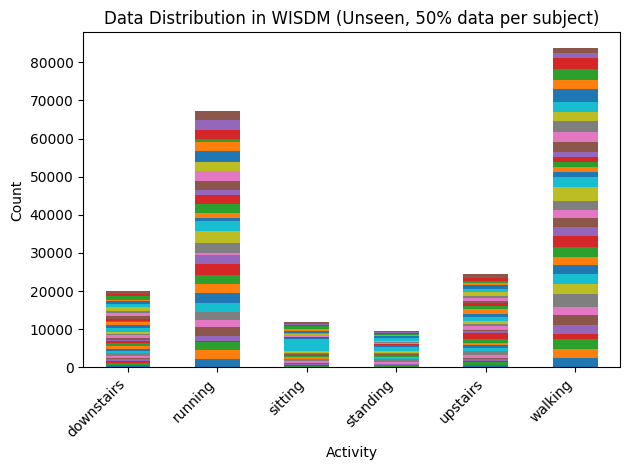


Dataset: DaLiAc (Unseen, 50% data per subject)
SubjectID      1      2      3      4      5     6      7     8      9     10  \
activity                                                                        
downstairs   1393   1434   1433   1761   1024  1556   1638  1147   1311  1761   
running      5079   4956   4915   4956   4956  4997   4915  4792   4915  4874   
sitting      2458   2458   2416   2457   2498  2458   2458  2417   2457  2416   
standing     2457   2416   2458   2457   2457  2457   2457  2376   2458  2457   
upstairs     1392   1802   1966   2007   1270  1679   1843  1474   1474  1884   
walking     10404  19989  11141  10035  13394  6472  15770  8274  10609  9994   

SubjectID      11    12     13     14     15     16    17    18    19  
activity                                                               
downstairs   1556  1597   1474   1433   1433   1270  1597  1597  1597  
running      4792  4915   4915   4915   4833   4874  4915  4915  4833  
sitting      23

<Figure size 1200x600 with 0 Axes>

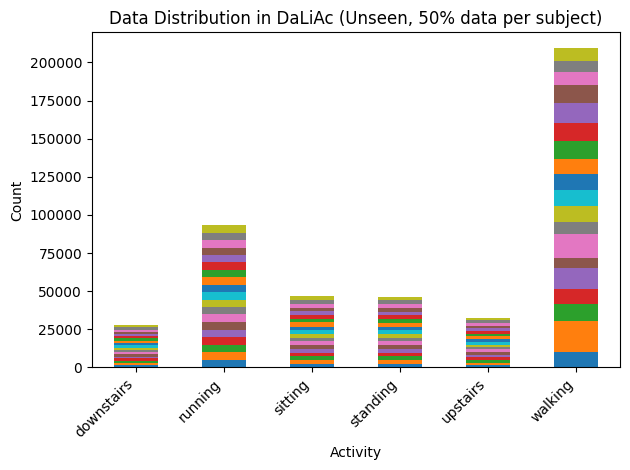


Dataset: PAMAP2 (Unseen, 50% data per subject)
SubjectID      101     102     103     104     105     106     107     108
activity                                                                  
downstairs  2981.0  3044.0  3055.0  2857.0  2546.0  2255.0  2325.0  1931.0
running     4253.0  1849.0     NaN     1.0  4930.0  4565.0   739.0  3307.0
sitting     4696.0  4469.0  5753.0  5099.0  5374.0  4609.0  2457.0  4586.0
standing    4344.0  5116.0  4108.0  4942.0  4427.0  4872.0  5151.0  5032.0
upstairs    3178.0  3469.0  2079.0  3340.0  2857.0  2659.0  3530.0  2338.0
walking     4452.0  6508.0  5808.0  6387.0  6408.0  5145.0  6744.0  6308.0


<Figure size 1200x600 with 0 Axes>

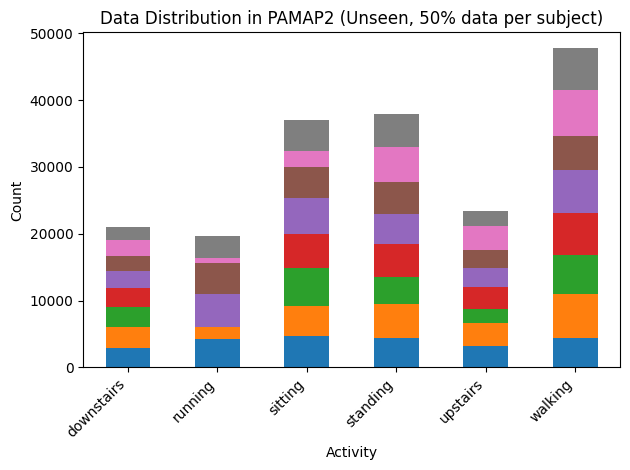


Dataset: Motionsense (Unseen, 50% data per subject)
SubjectID   0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   ...  \
activity                                                                ...   
downstairs  1021  1175  1264  1017  1009  1149  1007  1156  1099  1335  ...   
running     1285  1283  1193  1243   864  1054  1179  1239   983  1170  ...   
sitting     4116  2586  2839  2433  2781  2370  3260  2875  3241  3052  ...   
standing    2549  2055  2861  2113  2483  2870  2377  2733  1965  2082  ...   
upstairs    1267  1447  1311  1291  1115  1077  1490  1426  1298  1365  ...   
walking     2222  3920  3039  3115  2202  2944  2940  2714  2838  2954  ...   

SubjectID   14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  
activity                                                                
downstairs   937  1305  1236  1450  1080  1150  1501   888  1244   709  
running     1030  1302   867  1223  1284  1105  1434  1256  1192   726  
sitting     3159  3045

<Figure size 1200x600 with 0 Axes>

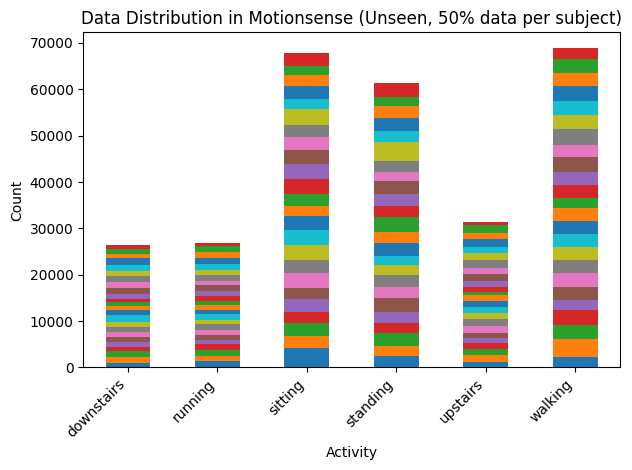

In [ ]:
# prompt: if  plotting amount of data in unseen  set on every dataset which 50% of group by subject id

import pandas as pd
import matplotlib.pyplot as plt
for dataset_name, paths in dataset_paths.items():
  unseen_path = paths[2][0]
  df_unseen = pd.read_csv(unseen_path)

  # Group by subject ID and count the number of rows in each group
  subject_counts = df_unseen.groupby('SubjectID')['SubjectID'].count()

  # Calculate the 50% threshold for each subject
  threshold = subject_counts * 0.5

  # Filter the DataFrame to include only rows where the subject ID has more than 50% data
  filtered_df = df_unseen[df_unseen['SubjectID'].isin(threshold[threshold >= 1].index)]

  # Group by activity and subject ID and count the number of rows in each group
  activity_subject_counts = filtered_df.groupby(['activity', 'SubjectID'])['activity'].count().unstack()

  print(f"\nDataset: {dataset_name} (Unseen, 50% data per subject)")
  print(activity_subject_counts)

  # Plot the data with improved aesthetics
  plt.figure(figsize=(12, 6))
  activity_subject_counts.plot(kind='bar', stacked=True)
  plt.xlabel("Activity")
  plt.ylabel("Count")
  plt.title(f"Data Distribution in {dataset_name} (Unseen, 50% data per subject)")
  plt.xticks(rotation=45, ha='right')
  plt.legend().remove() # Remove legend
  plt.tight_layout()
  plt.show()


In [ ]:
# prompt:  prompt: DatasetSampling Rate (Hz), Window Size (Samples)
#  WISDM20 Hz ,200
# PAMAP2100 Hz,1000
# MotionSense50 Hz,500
# DaLiAc200 Hz , 2000
# calculate in unseen set on every dataset group by activity and print amount of data Activity | Window Count | samples | as in matrix if windows size is 10 second

import pandas as pd
sampling_rates = {
    "WISDM": 20,
    "PAMAP2": 100,
    "Motionsense": 50,
    "DaLiAc": 200
}

window_sizes = {
    "WISDM": 200,
    "PAMAP2": 1000,
    "Motionsense": 500,
    "DaLiAc": 2000
}

window_duration = 10  # seconds

for dataset_name, paths in dataset_paths.items():
  unseen_path = paths[2][0]
  df_unseen = pd.read_csv(unseen_path)

  print(f"\nDataset: {dataset_name} (Unseen)")
  for activity in df_unseen['activity'].unique():
    activity_df = df_unseen[df_unseen['activity'] == activity]
    window_count = 0
    total_samples = 0

    for subject_id in activity_df['SubjectID'].unique():
        subject_df = activity_df[activity_df['SubjectID'] == subject_id]
        num_samples = subject_df.shape[0]
        window_size_in_samples = window_duration * sampling_rates[dataset_name]

        num_windows = num_samples // window_size_in_samples
        window_count += num_windows
        total_samples += num_windows * window_size_in_samples

    print(f"Activity: {activity} | Window Count: {window_count} | Samples: {total_samples}")



Dataset: WISDM (Unseen)
Activity: downstairs | Window Count: 81 | Samples: 16200
Activity: running | Window Count: 321 | Samples: 64200
Activity: upstairs | Window Count: 107 | Samples: 21400
Activity: walking | Window Count: 402 | Samples: 80400
Activity: sitting | Window Count: 49 | Samples: 9800
Activity: standing | Window Count: 35 | Samples: 7000

Dataset: DaLiAc (Unseen)
Activity: downstairs | Window Count: 0 | Samples: 0
Activity: running | Window Count: 38 | Samples: 76000
Activity: sitting | Window Count: 19 | Samples: 38000
Activity: standing | Window Count: 19 | Samples: 38000
Activity: upstairs | Window Count: 1 | Samples: 2000
Activity: walking | Window Count: 95 | Samples: 190000

Dataset: PAMAP2 (Unseen)
Activity: downstairs | Window Count: 17 | Samples: 17000
Activity: running | Window Count: 16 | Samples: 16000
Activity: sitting | Window Count: 33 | Samples: 33000
Activity: standing | Window Count: 35 | Samples: 35000
Activity: upstairs | Window Count: 20 | Samples: 2

In [ ]:
# prompt: from result above printting 50% of the activity data as Activity: | Window Count: | Samples:

import pandas as pd
for dataset_name, paths in dataset_paths.items():
  unseen_path = paths[2][0]
  df_unseen = pd.read_csv(unseen_path)

  print(f"\nDataset: {dataset_name} (Unseen)")
  for activity in df_unseen['activity'].unique():
    activity_df = df_unseen[df_unseen['activity'] == activity]
    window_count = 0
    total_samples = 0

    for subject_id in activity_df['SubjectID'].unique():
        subject_df = activity_df[activity_df['SubjectID'] == subject_id]
        num_samples = subject_df.shape[0]
        window_size_in_samples = window_duration * sampling_rates[dataset_name]

        num_windows = (num_samples // window_size_in_samples)
        window_count += num_windows
        total_samples += num_windows * window_size_in_samples


    print(f"Activity: {activity} | Window Count: {int(window_count * 0.5)} | Samples: {int(total_samples * 0.5)}")



Dataset: WISDM (Unseen)
Activity: downstairs | Window Count: 40 | Samples: 8100
Activity: running | Window Count: 160 | Samples: 32100
Activity: upstairs | Window Count: 53 | Samples: 10700
Activity: walking | Window Count: 201 | Samples: 40200
Activity: sitting | Window Count: 24 | Samples: 4900
Activity: standing | Window Count: 17 | Samples: 3500

Dataset: DaLiAc (Unseen)
Activity: downstairs | Window Count: 0 | Samples: 0
Activity: running | Window Count: 19 | Samples: 38000
Activity: sitting | Window Count: 9 | Samples: 19000
Activity: standing | Window Count: 9 | Samples: 19000
Activity: upstairs | Window Count: 0 | Samples: 1000
Activity: walking | Window Count: 47 | Samples: 95000

Dataset: PAMAP2 (Unseen)
Activity: downstairs | Window Count: 8 | Samples: 8500
Activity: running | Window Count: 8 | Samples: 8000
Activity: sitting | Window Count: 16 | Samples: 16500
Activity: standing | Window Count: 17 | Samples: 17500
Activity: upstairs | Window Count: 10 | Samples: 10000
Acti

In [ ]:
# prompt: DatasetSampling Rate (Hz), Window Size (Samples)
# WISDM20 Hz ,200
# PAMAP2100 Hz,1000
# MotionSense50 Hz,500
# DaLiAc200 Hz , 2000
# calculate in unseen set on every dataset group by activity and print amount of data Activity | Window Count | samples as in matrix

import pandas as pd
sampling_rates = {
    "WISDM": 20,
    "PAMAP2": 100,
    "Motionsense": 50,
    "DaLiAc": 200,
}

window_sizes = {
    "WISDM": 200,
    "PAMAP2": 1000,
    "Motionsense": 500,
    "DaLiAc": 2000,
}

for dataset_name, paths in dataset_paths.items():
  unseen_path = paths[2][0]
  df_unseen = pd.read_csv(unseen_path)

  print(f"\nDataset: {dataset_name} (Unseen)")

  for activity in df_unseen['activity'].unique():
    activity_df = df_unseen[df_unseen['activity'] == activity]
    num_samples = activity_df.shape[0]
    window_count = num_samples // window_sizes[dataset_name]
    print(f"Activity: {activity} | Window Count: {window_count} | Samples: {num_samples}")



Dataset: WISDM (Unseen)
Activity: downstairs | Window Count: 100 | Samples: 20073
Activity: running | Window Count: 336 | Samples: 67273
Activity: upstairs | Window Count: 122 | Samples: 24561
Activity: walking | Window Count: 418 | Samples: 83660
Activity: sitting | Window Count: 59 | Samples: 11973
Activity: standing | Window Count: 48 | Samples: 9666

Dataset: DaLiAc (Unseen)
Activity: downstairs | Window Count: 14 | Samples: 28012
Activity: running | Window Count: 46 | Samples: 93262
Activity: sitting | Window Count: 23 | Samples: 46569
Activity: standing | Window Count: 23 | Samples: 46318
Activity: upstairs | Window Count: 16 | Samples: 32640
Activity: walking | Window Count: 104 | Samples: 209265

Dataset: PAMAP2 (Unseen)
Activity: downstairs | Window Count: 20 | Samples: 20994
Activity: running | Window Count: 19 | Samples: 19644
Activity: sitting | Window Count: 37 | Samples: 37043
Activity: standing | Window Count: 37 | Samples: 37992
Activity: upstairs | Window Count: 23 | 

In [ ]:
# prompt: from result above printting 50% of the activity data

import pandas as pd
for dataset_name, paths in dataset_paths.items():
  unseen_path = paths[2][0]
  df_unseen = pd.read_csv(unseen_path)

  # Group by activity and count the number of rows in each group
  activity_counts = df_unseen.groupby('activity')['activity'].count()

  print(f"\nDataset: {dataset_name} (Unseen)")

  for activity, count in activity_counts.items():
    print(f"Activity: {activity} | 50% Data Count: {int(count * 0.5)}")



Dataset: WISDM (Unseen)
Activity: downstairs | 50% Data Count: 10036
Activity: running | 50% Data Count: 33636
Activity: sitting | 50% Data Count: 5986
Activity: standing | 50% Data Count: 4833
Activity: upstairs | 50% Data Count: 12280
Activity: walking | 50% Data Count: 41830

Dataset: DaLiAc (Unseen)
Activity: downstairs | 50% Data Count: 14006
Activity: running | 50% Data Count: 46631
Activity: sitting | 50% Data Count: 23284
Activity: standing | 50% Data Count: 23159
Activity: upstairs | 50% Data Count: 16320
Activity: walking | 50% Data Count: 104632

Dataset: PAMAP2 (Unseen)
Activity: downstairs | 50% Data Count: 10497
Activity: running | 50% Data Count: 9822
Activity: sitting | 50% Data Count: 18521
Activity: standing | 50% Data Count: 18996
Activity: upstairs | 50% Data Count: 11725
Activity: walking | 50% Data Count: 23880

Dataset: Motionsense (Unseen)
Activity: downstairs | 50% Data Count: 13181
Activity: running | 50% Data Count: 13417
Activity: sitting | 50% Data Count: 